In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
pd.options.display.max_columns = 999
pd.options.display.max_rows = 100
from scipy import stats
from sklearn.externals import joblib
from sklearn.metrics import r2_score

In [29]:
df = pd.read_csv('../out/df_cluster.csv')

In [30]:
df.head()

,Latitude,Longitude,RSRP(All MRs) (dBm),MR Count_dca,DL Traffic Volume (MB),UL Traffic Volume (MB),Total Traffic Volume (MB),UL Traffic Volume of Small Traffic Services (MB),Average DL Throughput (kbit/s),DL Low-Throughput Ratio(%),Average UL Throughput (kbit/s),UL Low-Throughput Ratio(%),DL Packet Loss Rate (%),UL Packet Loss Rate (%),DL IBLER (%),UL IBLER (%),DL MCS (only for Initial Transmission),UL MCS (only for Initial Transmission),Average DL Wideband CQI (Code Word 0),Average DL Wideband CQI (Code Word 1),DL Spectrum Efficiency (Byte/RB),UL Spectrum Efficiency (Byte/RB),Average DL RB Quantity,Average UL RB Quantity,Rank 2 Percentage(%),Number of Subscribers,Percentage of QCI 1 (%),Percentage of QCI 2 (%),Percentage of QCI 3 (%),Percentage of QCI 4 (%),Percentage of QCI 5 (%),Percentage of QCI 6 (%),Percentage of QCI 7 (%),Percentage of QCI 8 (%),Percentage of QCI 9 (%),cluster
0,13.461036,100.858384,-103.0,1,0.009,0.031,0.040,0.004,1837.499,100.00,3348.880,0.0,0.0,0.0,46.04,6.80,7,5,5.0,9.0,1.62,9.20,15.0,22.0,0.00,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0
1,13.461486,100.848189,-95.0,1,0.002,0.004,0.006,0.003,2992.187,100.00,13164.062,0.0,0.0,0.0,76.54,8.65,1,16,6.0,4.0,0.32,14.94,18.0,3.0,0.00,0,0.0,0.0,0.0,0.0,50.0,0.0,0.0,50.0,0.0,0
2,13.461486,100.851897,-104.0,1,0.000,0.000,0.000,0.000,8392.336,45.81,3589.113,16.3,0.0,0.0,76.19,20.00,1,25,9.0,9.0,0.02,0.00,11.0,1.0,0.00,1,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0
3,13.461486,100.863018,-83.5,2,0.704,0.062,0.766,0.053,9197.544,0.00,12480.468,0.0,0.0,0.0,18.30,0.77,10,27,6.0,6.0,18.69,36.53,31.0,1.0,0.48,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,1
4,13.461935,100.864408,-94.0,1,0.000,0.000,0.000,0.000,8392.336,45.81,3589.113,16.3,0.0,0.0,6.90,12.50,2,23,5.0,9.0,0.79,0.00,6.0,1.0,93.33,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,1


In [21]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
col_drop = ['Latitude','Longitude','cluster','DL Traffic Volume (MB)','UL Traffic Volume (MB)',\
            'UL Traffic Volume of Small Traffic Services (MB)','Total Traffic Volume (MB)','MR Count_dca']
X = sc_X.fit_transform(df.drop(col_drop,axis=1))
y = sc_y.fit_transform(df['Total Traffic Volume (MB)'].values.reshape(-1,1))

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
from sklearn.ensemble import RandomForestRegressor

In [21]:
rfr = RandomForestRegressor(n_estimators=100,oob_score=True,n_jobs=-1,min_samples_leaf=5)

In [22]:
rfr.fit(X_train,y_train)

/Users/witchapong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=True, random_state=None, verbose=0, warm_start=False)

In [23]:
y_pred = rfr.predict(X_test)

In [26]:
r2_score(y_test,y_pred)

0.6046966398555822

In [27]:
from sklearn.externals import joblib
# Output a pickle file for the model
joblib.dump(rfr, '../out/rfr.pkl')

['../out/rfr.pkl']

In [10]:
from sklearn.externals import joblib
rfr = joblib.load('../out/rfr 2.pkl') 

In [11]:
corr_list = [np.corrcoef(df[col],df['Total Traffic Volume (MB)'])[0][1] for col in df.drop(col_drop,axis=1).columns]
df_feat_imp = pd.DataFrame({'feat':df.drop(col_drop,axis=1).columns, 'imp':rfr.feature_importances_,\
                            'corr':corr_list}).sort_values('imp',ascending = False)

/Users/witchapong/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:2400: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/Users/witchapong/anaconda3/lib/python3.6/site-packages/numpy/lib/function_base.py:2401: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]


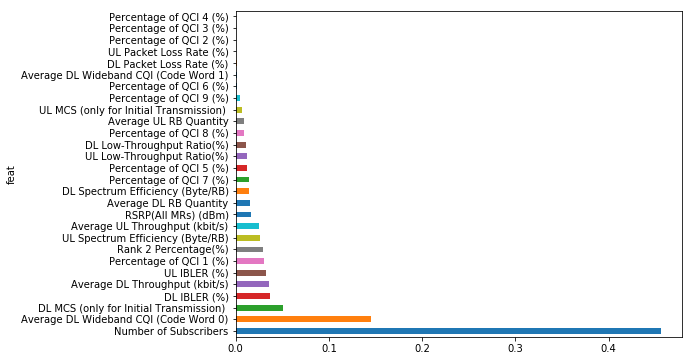

In [12]:
df_feat_imp.plot('feat','imp','barh',figsize=(8,6),legend=False)

In [14]:
df_feat_imp.iloc[:15,:]

,feat,imp,corr
18,Number of Subscribers,0.455869,0.570177
11,Average DL Wideband CQI (Code Word 0),0.144964,0.139733
9,DL MCS (only for Initial Transmission),0.050647,0.115145
7,DL IBLER (%),0.036849,-0.023496
1,Average DL Throughput (kbit/s),0.036194,0.094615
8,UL IBLER (%),0.032535,-0.059496
19,Percentage of QCI 1 (%),0.030065,-0.003571
17,Rank 2 Percentage(%),0.028983,0.099870
14,UL Spectrum Efficiency (Byte/RB),0.026439,0.078167
3,Average UL Throughput (kbit/s),0.025219,0.108201


In [32]:
idxs = np.random.permutation(df.index)[:int(0.50*df.shape[0])]
df = df.iloc[idxs,:]

In [31]:
col_drop = ['Latitude','Longitude','cluster','DL Traffic Volume (MB)','UL Traffic Volume (MB)',\
            'UL Traffic Volume of Small Traffic Services (MB)','Total Traffic Volume (MB)','MR Count_dca']


In [33]:
df_X = df.drop(col_drop,axis=1)
y = df['Total Traffic Volume (MB)'].values

In [36]:
df_X.head()

,RSRP(All MRs) (dBm),Average DL Throughput (kbit/s),DL Low-Throughput Ratio(%),Average UL Throughput (kbit/s),UL Low-Throughput Ratio(%),DL Packet Loss Rate (%),UL Packet Loss Rate (%),DL IBLER (%),UL IBLER (%),DL MCS (only for Initial Transmission),UL MCS (only for Initial Transmission),Average DL Wideband CQI (Code Word 0),Average DL Wideband CQI (Code Word 1),DL Spectrum Efficiency (Byte/RB),UL Spectrum Efficiency (Byte/RB),Average DL RB Quantity,Average UL RB Quantity,Rank 2 Percentage(%),Number of Subscribers,Percentage of QCI 1 (%),Percentage of QCI 2 (%),Percentage of QCI 3 (%),Percentage of QCI 4 (%),Percentage of QCI 5 (%),Percentage of QCI 6 (%),Percentage of QCI 7 (%),Percentage of QCI 8 (%),Percentage of QCI 9 (%)
841221,-105.09,4124.574,72.50,1186.730,46.88,0.0,0.00,15.05,8.85,8,17,6.0,6.0,13.92,9.76,22.0,1.0,17.79,5,0.21,0.0,0.0,0.0,6.63,0.0,0.25,92.90,0.0
733451,-98.54,8922.705,36.84,3556.991,18.18,0.0,0.01,14.40,7.00,13,22,9.0,9.0,26.05,14.81,22.0,7.0,23.49,25,0.13,0.0,0.0,0.0,9.65,0.0,7.53,82.68,0.0
1676710,-94.01,7591.494,46.51,3311.451,19.75,0.0,0.00,17.84,5.09,12,25,9.0,8.0,22.20,30.25,23.0,1.0,23.95,52,0.16,0.0,0.0,0.0,4.61,0.0,0.04,95.19,0.0
558425,-86.58,7388.791,54.83,4420.580,17.57,0.0,0.00,14.47,4.29,12,24,9.0,9.0,28.24,32.14,16.0,4.0,47.24,605,0.08,0.0,0.0,0.0,16.00,0.0,8.65,75.27,0.0
1502956,-94.10,8148.011,57.24,2719.328,16.53,0.0,0.00,13.96,5.67,13,25,9.0,9.0,23.10,20.09,30.0,4.0,19.89,10,0.04,0.0,0.0,0.0,13.42,0.0,1.23,85.31,0.0


In [40]:
rfr = RandomForestRegressor(n_estimators=100,oob_score=True,n_jobs=-1,min_samples_leaf=5)

In [41]:
rfr.fit(df_X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=5, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=True, random_state=None, verbose=0, warm_start=False)

In [42]:
from pdpbox import pdp

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x12dfa7b70>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x12dfc5f98>})

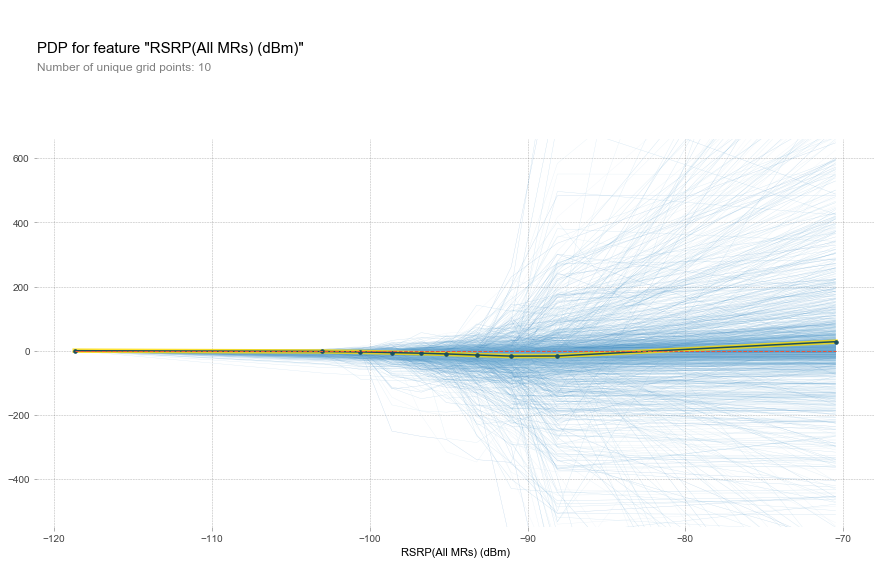

In [56]:
# define x as 50% sample of whole data
idxs = np.random.permutation(df_X.index)[:2000]
df_X_samp = df_X.loc[idxs,:]
def plot_pdp(df_feat, feat, m, clusters=None, feat_name=None):
    feat_name = feat_name or feat
    p = pdp.pdp_isolate(m, df_feat, df_feat.columns, feat)
    return pdp.pdp_plot(p, feat_name, plot_lines=True,
                        cluster=clusters is not None,
                        n_cluster_centers=clusters)

plot_pdp(df_X_samp,'RSRP(All MRs) (dBm)',rfr)

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x1305baba8>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x1306b70f0>})

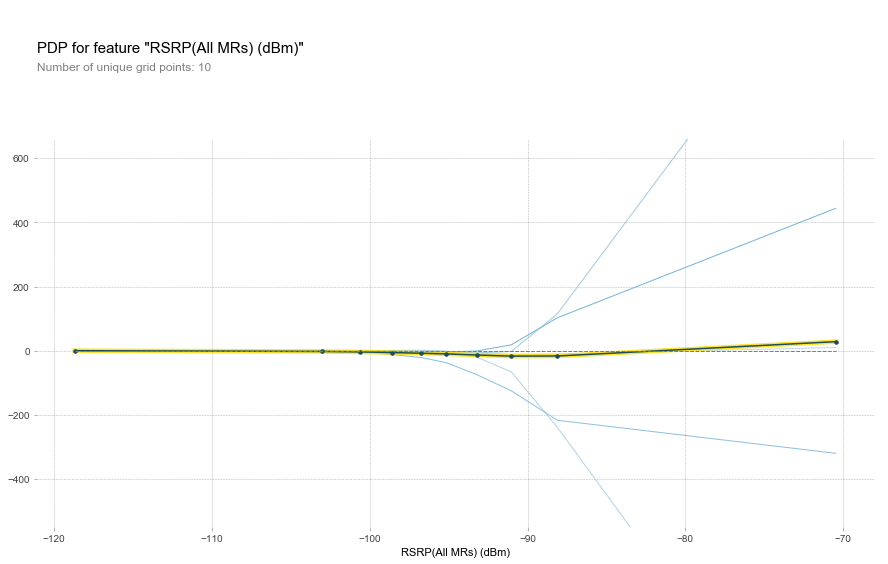

In [57]:
# define x as 50% sample of whole data
plot_pdp(df_X_samp,'RSRP(All MRs) (dBm)',rfr, clusters=5)

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x1233e72b0>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x123404b70>})

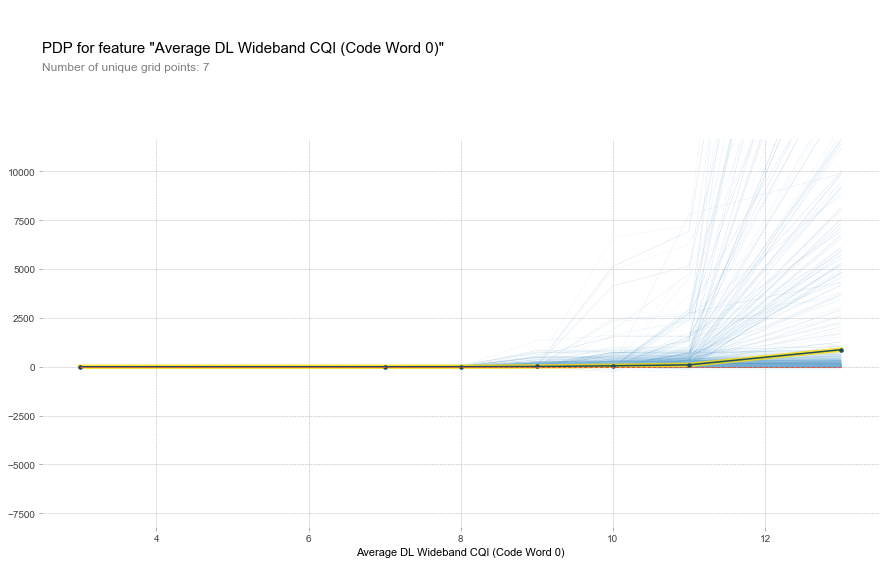

In [54]:
# define x as 50% sample of whole data
idxs = np.random.permutation(df_X.index)[:2000]
df_X_samp = df_X.loc[idxs,:]
def plot_pdp(df_feat, feat, m, clusters=None, feat_name=None):
    feat_name = feat_name or feat
    p = pdp.pdp_isolate(m, df_feat, df_feat.columns, feat)
    return pdp.pdp_plot(p, feat_name, plot_lines=True,
                        cluster=clusters is not None,
                        n_cluster_centers=clusters)

plot_pdp(df_X_samp,'Average DL Wideband CQI (Code Word 0)',rfr)

(<Figure size 1080x684 with 2 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x12daa9828>,
  'pdp_ax': <matplotlib.axes._subplots.AxesSubplot at 0x12e099940>})

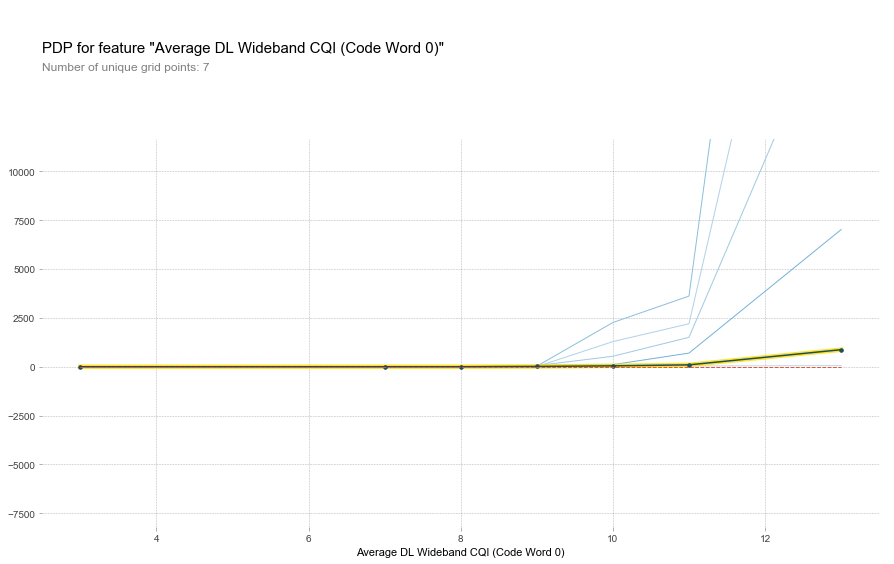

In [55]:
# define x as 50% sample of whole data
plot_pdp(df_X_samp,'Average DL Wideband CQI (Code Word 0)',rfr, clusters=5)